Setup detectron2 logger.

In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

Import necessary libraries.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import sys
%matplotlib inline

Import detectron2 utilities

In [5]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

--2020-05-20 14:56:52--  http://images.cocodataset.org/val2017/000000439715.jpg
Auflösen des Hostnamens images.cocodataset.org (images.cocodataset.org)… 52.216.145.27
Verbindungsaufbau zu images.cocodataset.org (images.cocodataset.org)|52.216.145.27|:80 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 209222 (204K) [image/jpeg]
Wird in »input.jpg« gespeichert.

input.jpg           100%[===================>] 204,32K   506KB/s    in 0,4s    

2020-05-20 14:56:53 (506 KB/s) - »input.jpg« gespeichert [209222/209222]



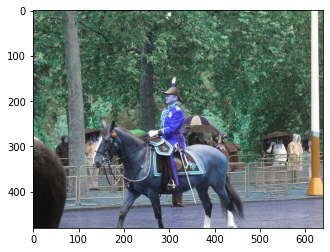

In [7]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("input.jpg")
#h,w = im.shape[:2]
plt.imshow(im)
#plt.show()

Set config.

In [8]:
cfg = get_cfg()

# Add project specifig confi
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # Set threshold

# Run model on CPU
cfg.MODEL.DEVICE = 'cpu'

# Find a model from the mode zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

Set output and predictor.

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Look at outputs.

In [11]:
outputs["instances"].pred_classes

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24])

In [13]:
outputs["instances"].pred_boxes

Boxes(tensor([[126.6049, 244.8984, 459.8287, 480.0000],
        [251.1093, 157.8128, 338.9732, 413.6367],
        [114.8497, 268.6858, 148.2353, 398.8107],
        [  0.8217, 281.0327,  78.6073, 478.4209],
        [ 49.3954, 274.1232,  80.1549, 342.9802],
        [561.2246, 271.5817, 596.2748, 385.2531],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9296, 278.3742, 562.2794, 389.3802],
        [335.2410, 251.9167, 414.7491, 275.9375],
        [350.9302, 269.2061, 386.0984, 297.9080],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2655, 570.9864, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8766, 283.3257, 529.9404, 324.0391],
        [594.5659, 283.4807, 609.0584, 311.4129]]))

In [17]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale = 1.2)
v = v.draw_instance_predictions(outputs["instances"]).to("cpu")
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()

AttributeError: 'VisImage' object has no attribute 'to'